In [37]:
import pandas as pd
import numpy as np
from collections import defaultdict 
import sys
import os
import matplotlib.pyplot as plt
import _thread as thread
from matplotlib.pyplot import figure
from tabulate import tabulate
import threading
import time

In [14]:
addr_l = [510
          , 511, 526, 600, 602, 620, 623, 625, 631, 641, 648, 657
         ] 

sets = [x for x in range(64)]
# ADDR = '/nfs_home/nbhardwaj/data/rds_data/SPEC2017/'
ADDR = '/nfs_home/nbhardwaj/data/rds_final/'
w_ADDR = '/nfs_home/nbhardwaj/results/'

In [34]:
# instr maps
# m = defaultdict(list)
# fm = defaultdict(list)

# #data maps
# m2 = defaultdict(list)
# fm2 = defaultdict(list)
m3 = {}
# s_inst = defaultdict(set) # unique instr across sets 0-63
# u_inst = defaultdict(list) # unique instr in a file and set
# f_inst = defaultdict(list) # unique instr in a file
for fname in addr_l:
    begin = time.time()
    for cset in sets:
        cADDR = ADDR+str(fname)+'_'+str(cset)+'.csv'
        df = pd.read_csv(cADDR,usecols = ['delta'])
        udelta, counts = np.unique(df.delta.values, return_counts = True)
        for idx in range(len(udelta)):
            val = udelta[idx]
            cnt = counts[idx]
            if(m3.get(val) != None):
                m3[val][fname]+=cnt
            else:
                m3[val] = {}
                m3[val].update(zip(addr_l, np.zeros((len(addr_l)))))
                m3[val][fname] = cnt
    print("finished-->", fname, "|| time passed->",time.time()-begin, "seconds")
np.save(w_ADDR+'m_delta.npy', m3)
# np.save(w_ADDR+'m2.npy', m2)
# np.save(RES_ADDR+'fm.npy', fm)
# np.save(RES_ADDR+'fm2.npy', fm2)
print("XX || Its DONE || XX")

finished--> 510 || time passed-> 0.28768205642700195 seconds
finished--> 511 || time passed-> 0.2913057804107666 seconds
finished--> 526 || time passed-> 0.28650784492492676 seconds
finished--> 600 || time passed-> 0.3425259590148926 seconds
finished--> 602 || time passed-> 0.3313298225402832 seconds
finished--> 620 || time passed-> 0.3235170841217041 seconds
finished--> 623 || time passed-> 0.3055591583251953 seconds
finished--> 625 || time passed-> 0.32311558723449707 seconds
finished--> 631 || time passed-> 0.3236989974975586 seconds
finished--> 641 || time passed-> 0.31602907180786133 seconds
finished--> 648 || time passed-> 0.3265373706817627 seconds
finished--> 657 || time passed-> 0.34395337104797363 seconds
XX || Its DONE || XX


In [16]:
# m = np.load(w_ADDR+'m.npy', allow_pickle = True).item()
# m2 = np.load(w_ADDR+'m2.npy', allow_pickle = True).item()
# fm = np.load(w_ADDR+'fm.npy', allow_pickle = True).item()
# fm2 = np.load(w_ADDR+'fm2.npy', allow_pickle = True).item()

In [38]:
m3 = np.load(w_ADDR+'m_delta.npy', allow_pickle = True).item()


In [49]:
m4 = {}
for x in m3.keys():
    if(x!=np.nan):
        m4[x] = np.sum(np.fromiter(m3[x].values(), dtype = float))

In [56]:
m5 = sorted(m4.items(), key = lambda x:x[1], reverse = True)

In [68]:
m5[0][:]

(0.0, 4443442851.0)

TypeError: list indices must be integers or slices, not tuple

In [101]:
# mdelta = defaultdict(list) # global unique delta
# s_delta = defaultdict(set) # unique delta across sets 0-63
# fs_delta = defaultdict(list) # unique delta in a file and set
# f_delta = defaultdict(list) # unique delta in a file
# freq_delta = {}
# for fname in addr_l:
#     p = set()
#     start_time = time.time()
#     for cset in sets:
#         cADDR = ADDR+str(fname)+'_'+str(cset)+'.csv'
#         df = pd.read_csv(cADDR, usecols = ['delta'])
#         delta_unique = df.delta.unique()
#         fs_delta[str(fname)+'_'+str(cset)] = len(delta_unique)
#         for d in delta_unique:
#             s_delta[cset].add(d)
#             p.add(d)
#             mdelta[d].append(str(fname)+'_'+str(cset)) 
#         for d in df.delta:
#             if(d in freq_delta.keys()):
#                 freq_delta[d]+=1
#             else:
#                 freq_delta[d] = 1
# #         print("done ->", cset)
#     f_delta[fname] = len(p)
#     end_time = time.time()
#     print("finished-->", fname, "||",end_time - start_time, "secs")


finished--> 510 || 319.0733940601349 secs
finished--> 511 || 521.0964343547821 secs
finished--> 526 || 377.2168593406677 secs
finished--> 600 || 329.70164728164673 secs
finished--> 602 || 495.89092803001404 secs
finished--> 620 || 691.9009749889374 secs
finished--> 623 || 540.9830358028412 secs
finished--> 625 || 342.83169865608215 secs
finished--> 631 || 440.5755727291107 secs
finished--> 641 || 380.2313504219055 secs
finished--> 648 || 587.0871863365173 secs
finished--> 657 || 359.1061851978302 secs


In [110]:
# a = sorted(freq_delta.items(), key = lambda x:x[1], reverse = True)

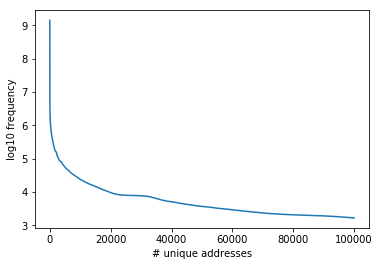

<Figure size 432x288 with 0 Axes>

In [140]:
# plt.plot([x for x in range(len(b))], np.log10(b))
# plt.xlabel('# unique addresses')
# plt.ylabel('log10 frequency')
# plt.show()
# plt.savefig('graphs/freqVSAddr')

In [151]:
# fname = '510'
# cset = '10'
# cADDR = ADDR+str(fname)+'_'+str(cset)+'.csv'
# df = pd.read_csv(cADDR)

# df['log_Data'] = np.log10(df.Data)


# ld = df.log_Data
# figure(figsize = (15, 1))
# plt.plot([x for x in range(len(ld))], ld)